In [1]:
#importing libraries
import numpy as np
import pandas as pd
#read the dataset file
data = pd.read_csv("ckd.csv")
data.head()

,ID,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,classification
0,1,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,2,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,3,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,4,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,5,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [2]:
#return row and column count of dataset
data.shape

(400, 26)

In [3]:
#return data type of each column
data.dtypes

ID                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wbcc              float64
rbcc              float64
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [4]:
#converting nominalvalues into binary values
mapping = {'yes':1, 'no':0}
#replacing binary values into dataset
data = data.replace({'htn':mapping,'pe':mapping,'ane':mapping,'dm':mapping,'cad':mapping})
mapping1 = {'normal':1, 'abnormal':0}
data = data.replace({'rbc':mapping1, 'pc':mapping1})
mapping4 = {'present':1, 'notpresent':0}
data = data.replace({'pcc':mapping4, 'ba':mapping4})
mapping5 = {'good':1, 'poor':0}
data = data.replace({'appet':mapping5})
mapping6 = {'ckd':1, 'notckd':0, 'ckd\t':1}
data = data.replace({'classification':mapping6})

In [5]:
data.dtypes

ID                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc               float64
pc                float64
pcc               float64
ba                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wbcc              float64
rbcc              float64
htn               float64
dm                float64
cad               float64
appet             float64
pe                float64
ane               float64
classification      int64
dtype: object

In [7]:
#dropping columns
data.drop(['ID','cad','dm'],axis=1,inplace=True)

In [9]:
data.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc               float64
pc                float64
pcc               float64
ba                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wbcc              float64
rbcc              float64
htn               float64
appet             float64
pe                float64
ane               float64
classification      int64
dtype: object

In [10]:
#To know how much of data is missing from each column
data.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wbcc              106
rbcc              131
htn                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [11]:
#fill null values with mean value of the respective column
data.fillna(round(data.mean(),2),inplace=True)

In [12]:
data.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wbcc              0
rbcc              0
htn               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [13]:
#save this dataset as final.csv for further prediction
data.to_csv("final.csv",sep=',',index=False)

In [16]:
data.shape

(400, 23)

[0.00125788 0.00952959 0.08863842 0.06998029 0.0088916  0.05287826
 0.02966791 0.005524   0.00064282 0.01366462 0.00705298 0.00952926
 0.00361557 0.00129429 0.05017398 0.03223429 0.00211601 0.02285427
 0.08313465 0.02389799 0.02041669 0.01433784 0.44866678]


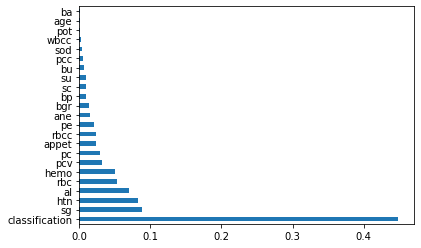

In [18]:
#Get the feature importance of each feature
import pandas as pd
import numpy as np
data = pd.read_csv("final.csv")
X = data.iloc[:,0:23] #independent columns
y = data.iloc[:,-1] #target column
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based class
#ifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(23).plot(kind='barh')
plt.show()

In [20]:
#dropping columns with less importance
data.drop(['pot','wbcc','sod','ba'],axis=1,inplace=True)

In [21]:
data.to_csv("final.csv",sep=',',index=False)

In [22]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,bgr,bu,sc,hemo,pcv,rbcc,htn,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,0.81,1.0,0.0,121.00,36.0,1.2,15.4,44.0,5.20,1.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,0.81,1.0,0.0,148.04,18.0,0.8,11.3,38.0,4.71,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,1.00,1.0,0.0,423.00,53.0,1.8,9.6,31.0,4.71,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,1.00,0.0,1.0,117.00,56.0,3.8,11.2,32.0,3.90,1.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,1.00,1.0,0.0,106.00,26.0,1.4,11.6,35.0,4.60,0.0,1.0,0.0,0.0,1


In [24]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [26]:
#Function importing dataset
def importdata():
    balance_data=pd.read_csv('final.csv',sep=',',header=0)
    #printing the dataset shapes
    print("Dataset Length:",len(balance_data))
    print("Dataset Shape:",balance_data.shape)
    #printing the dataset observations
    return balance_data

In [27]:
#Function to split the dataset
def splitdataset(balance_data):
    #seperating the target variable
    X=balance_data.values[:,0:18]
    Y=balance_data.values[:,-1]
    #splitting the dataset into train and test
    X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=100)
    return X,Y,X_train,X_test,y_train,y_test

In [29]:
#function to perform training with giniIndex
def train_using_gini(X_train,X_test,y_train):
    #creating the classifier object
    clf_gini=DecisionTreeClassifier(criterion="gini",random_state=100,max_depth=3,min_samples_leaf=5)
    #performing training
    clf_gini.fit(X_train,y_train)
    return clf_gini

In [30]:
#function to make predictions
def prediction(X_test,clf_object):
    #prediction on test with giniIndex
    y_pred=clf_object.predict(X_test)
    return y_pred

In [31]:
#function to calculate accuracy
def cal_accuracy(y_test,y_pred):
    print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
    print("Accuracy:",accuracy_score(y_test,y_pred)*100)
    print("Report:\n",classification_report(y_test,y_pred))

In [32]:
print("RANDOM DECISION TREE:::::::::::")
#building phase
data = importdata()
X,Y,X_train,X_test,y_train,y_test=splitdataset(data)
clf_gini=train_using_gini(X_train,X_test,y_train)

RANDOM DECISION TREE:::::::::::
Dataset Length: 400
Dataset Shape: (400, 19)


In [33]:
#operational phase
print("Results using Gini Index::::::::::")
#prediction using giniIndex
y_pred_gini=prediction(X_test,clf_gini)
cal_accuracy(y_test,y_pred_gini)

Results using Gini Index::::::::::
Confusion Matrix:
 [[39  1]
 [ 3 77]]
Accuracy: 96.66666666666667
Report:
               precision    recall  f1-score   support

         0.0       0.93      0.97      0.95        40
         1.0       0.99      0.96      0.97        80

    accuracy                           0.97       120
   macro avg       0.96      0.97      0.96       120
weighted avg       0.97      0.97      0.97       120



In [35]:
# Save the model as serialized object pickle
import pickle
with open('kidney.pkl','wb')as file:
    pickle.dump(clf_gini,file)